# Cálculo

<table><tr>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/3/3c/First_principles_differentiation_demo.svg" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/FTC_geometric.svg" alt="Drawing" style="width: 600px;"/> </td>
</tr></table>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation, PillowWriter 
from IPython.display import HTML
import warnings

%matplotlib inline

## Funções

Estamos trabalhando até agora com funções. Mas vamos rapidamente conceituar algumas coisas com as quais estamos mexendo o tempo todo:

- Função: um objeto matemático que recebe um elemento (em geral numérico) e retorna um outro elemento (em geral numérico também)
- Domínio: é o conjunto de elementos que podem ser inseridos na função
- Contradomínio: é o conjunto no qual estão todos os elementos retornados pela nossa função
- Imagem: é o subconjunto do contradomínio que contém um elemento correspondente éla função no conjunto imagem.

<div>
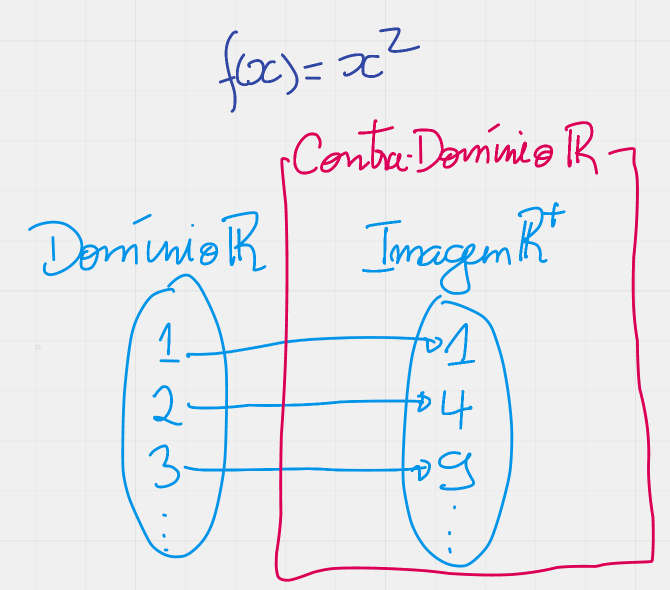
</div>


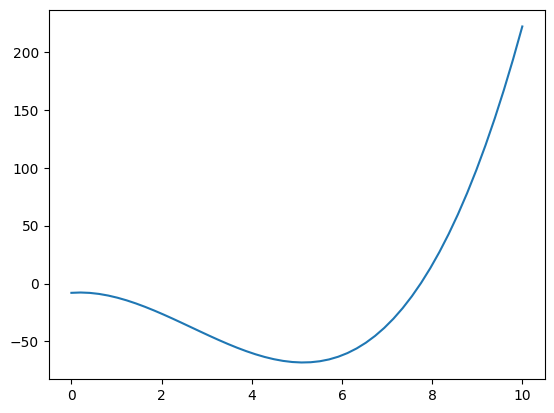

In [2]:
# Plotar uma função
x = np.linspace(0, 10, 50)

f = lambda x: x**3 - 8*x**2 +3*x -8
y = f(x)

plt.plot(x, y, '-')

## Limite

O conceito de limite expressa o valor retornado por uma função conforme ela se aproxima um certo valor especificado no seu domínio.

Por exemplo, na função 
$$f(x)=1/x$$
- Quanto maior o valor de $x$, mais $f(x)$ se aproxima de zero  


Dizemos então que:  
$\lim_{x \to \infty} f(x) = 0$  


Ou ainda:
- Tomando um valor real $x>0$, se calcularmos $f(x)$, quanto menor $x$, maior o valor de $f(x)$  
- $f(0)$ não está definida.


Dizemos então que:  
$\lim_{x \to 0} f(x) = \infty$



/tmp/ipykernel_9630/3218421629.py:3: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 1/x


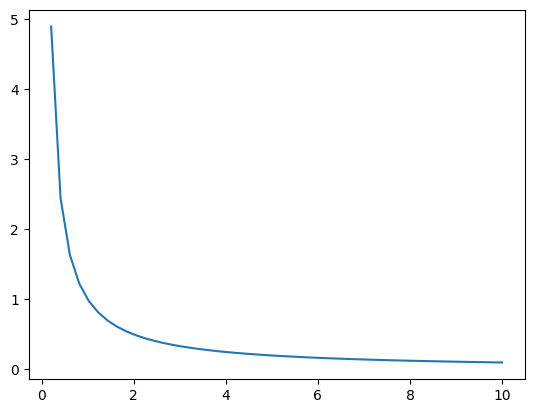

In [3]:
x = np.linspace(0,10, 50)

f = lambda x: 1/x
y = f(x)
plt.plot(x, y, '-');

In [4]:
f(100000000000)

1e-11

In [5]:
f(0.0000001)

10000000.0

## Derivada

O conceito de *derivada* de uma função é de extrema importância em matemática e em ciência de dados, pois é lançando mão dele, por exemplo, que encontramos os parâmetros de uma regressão linear através do método de mínimos quadrados, além de inúmeras outras aplicações.

A derivada de uma função avaliada em um ponto $x$ é a inclinação da reta tangente dessa função avaliada no ponto. Intuitivamente, é a reta tangente da função no ponto (x, f(x)).

|![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Secante_calculo.svg/280px-Secante_calculo.svg.png) | ![image-2.png](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Derivada.svg/255px-Derivada.svg.png) |
|:-|:-|

[fonte da imagem](https://pt.wikipedia.org/wiki/Derivada)


### Brincadeira com 'h' indo para zero

Vamos construir um gráfico da função $sen(x)$, e observar graficamente a reta que liga os pontos $(x, sen(x))$ e $(x+h, sen(x)+h$, com $h$ se aproximando de zero.

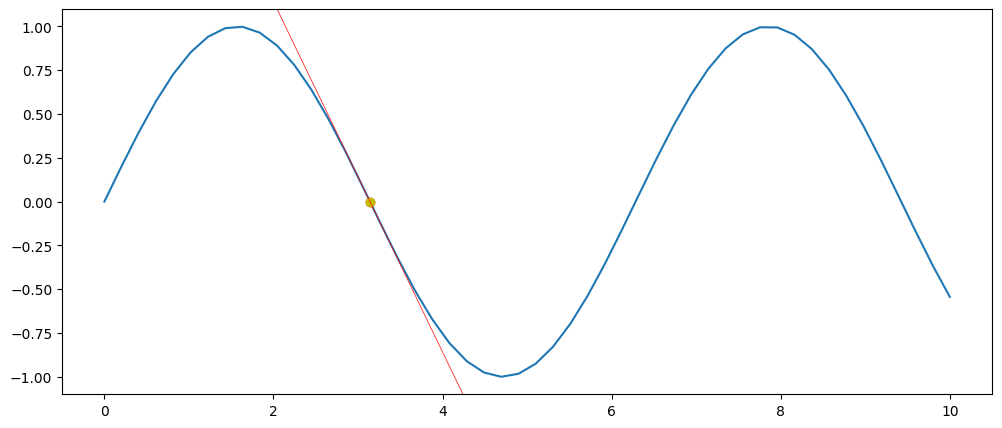

In [6]:
# Definir a figura e um sistema de eixos
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,1,1)

# Definir a função
f = lambda x: np.sin(x)

# Definir uma sequencia uniforme em x para o nosso gráfico
x = np.linspace(0, 10, 50)

# Construir o gráfico
ax.plot(x, f(x))

# Plotar um ponto x
x1 = np.pi
p1 = (x1, f(x1))
ax.plot(p1[0], p1[1], 'ro')

# Plotar x+h
h = .0001
x2 = x1+h
p2 = (x2, f(x2))
ax.plot(p2[0], p2[1], 'yo')

# Plotar secante
ax.axline(xy1=p1, xy2=p2, color='red', linewidth=.5)


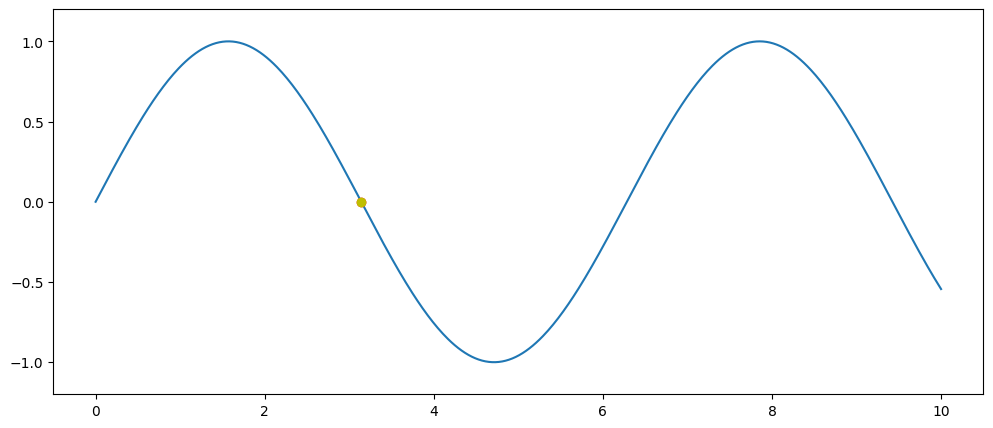

In [7]:
# Definir a figura e um sistema de eixos
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,1,1, ylim = (-1.2, 1.2))   

# Definir a função
f = lambda x: np.sin(x)

# Definir uma sequencia uniforme em x para o nosso gráfico
x = np.linspace(0,10, 500)
# Calcular f(x) para cada x da sequencia acima
y = f(x)

# Construir o gráfico
ax.plot(x, y, '-');

# Definir dois pontos vazios. Esses pontos vão receber
#      (x, f(x))
#      e (x+h, f(x+h))
h=1
x1 =  4.5
x2 = x1 + h
p1 = (x1, f(x1))

x2 = x1+h
p2 = (x2, f(x2))

pto1, = ax.plot(p1, 'ro')
pto2, = ax.plot(p2, 'yo')

linha = ax.axline(xy1=p1, xy2=p2, color="red", linewidth=.5)

def linha_ab(delta=1, x1=2 ,pt1=pto1, pt2=pto2):
    x2 = x1 + delta
    y1 = f(x1)
    y2 = f(x2)
    
    pt1.set_data([x1], [y1])
    pt2.set_data([x2], [y2])
    
    inclinação = (y2-y1)/(x2-x1)
    
    linha.set_data([x1, x2], [f(x1),  f(x2)])
    return (pt1, pt2)

  
linha_ab(delta=.001, x1=np.pi);


### Animação com 'h' indo para zero

Com base na função acima, vamos produzir uma animação com o ```matplotlib.animation```. 

In [8]:
%%time
# blit=True re-draws only the parts that have changed.
n_frames = 100
def desenha_frame(n, num = n_frames, hmax=1):
    return (linha_ab(delta=hmax - n*hmax/(n_frames+.1)))

anim = FuncAnimation(fig, desenha_frame, frames=n_frames, interval=20, blit=True)
HTML(anim.to_jshtml())

CPU times: user 4.74 s, sys: 64.7 ms, total: 4.8 s
Wall time: 4.77 s


### Brincadeira plotando $f(x)$ e $f'(x)$ com $f = seno$

A próxima célula plota a função $sen(x)$ e a sua derivada ($cos(x)$), realçando o valor da função, a reta tangente e o valor da derivada.

NameError: name 'x1_' is not defined

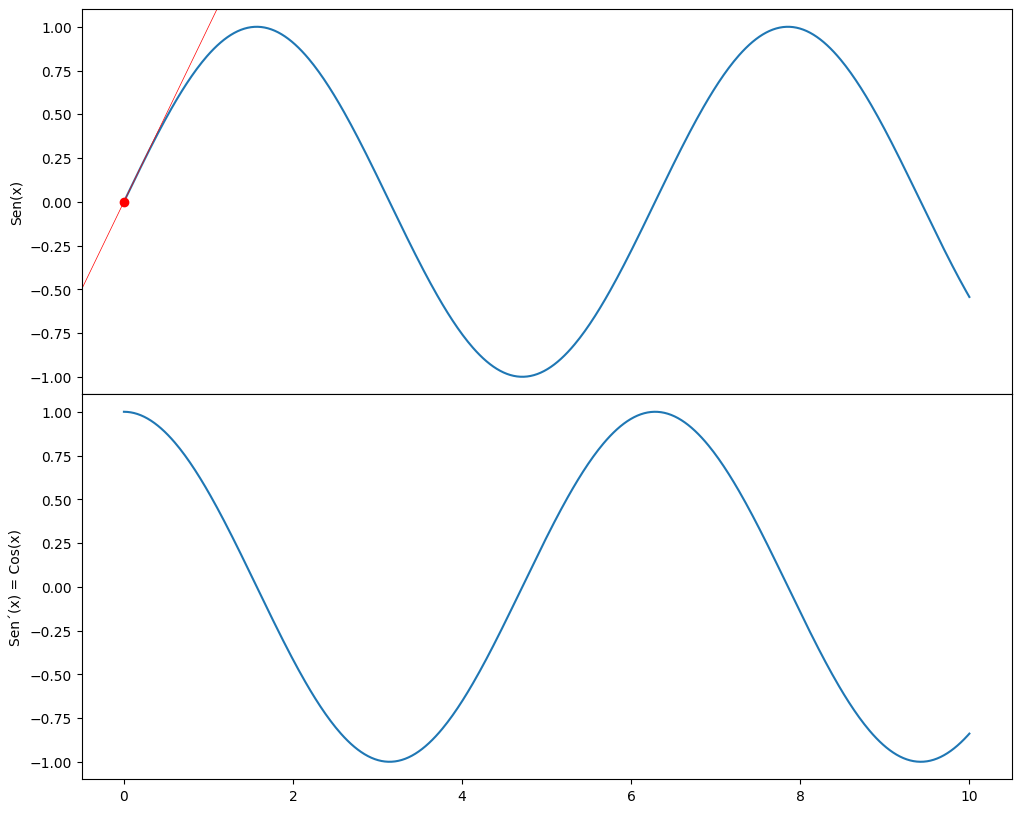

In [9]:
%%time
# Definir a figura e um sistema de eixos

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10))
plt.subplots_adjust(hspace=0)

ax1 = plt.subplot(2,1,1)   
ax2 = plt.subplot(2,1,2)   

# Definir a função
f = lambda x: np.sin(x)
flinha = lambda x: np.cos(x)

# Definir uma sequencia uniforme em x para o nosso gráfico
x = np.linspace(0,10, 500)
# Calcular f(x) para cada x da sequencia acima
y = f(x)

# Construir o gráfico
ax1.plot(x, y, '-');
ax2.plot(x, flinha(x))

# Rótulos dos eixos verticais
ax1.set_ylabel('Sen(x)')
ax2.set_ylabel('Sen´(x) = Cos(x)')

# Plotar (x, f(x)) e (x, f'(x)) nos grávicos
#      (x, f(x))
#      e (x+h, f(x+h))
h=.0001
x1 =  0
x2 = x1 + h

p1, = ax1.plot([x1], [f(x1)], 'ro')
linha = ax1.axline(xy1=[x1, f(x1)], xy2=[x2, f(x2)], color="red", linewidth=.5)

plinha, = ax2.plot([x1_], [flinha(x1_)], 'ro')

# Plota linhas verticais de referência em X nos dois gráficos
linhav1 = ax1.axvline(x1, linewidth=.5, linestyle='--')
linhav2 = ax2.axvline(x1, linewidth=.5, linestyle='--')

# Essa função altera os dados dos elementos do gráfico para a animação
def linha_ab(delta=.0001, x1=4.5 ,p1_=p1, p2_=p2, plin=plinha):
#     Dado o ponto x, define a derivada para um delta bem pequeno
    x2 = x1 + delta
    
    # Altera as linhas verticais de acordo com x
    linhav1.set_data([x1, x1], [0,1])
    linhav2.set_data([x1, x1], [0,1])
    
    # Altera os pontos de referencia de acordo com x
    p1_.set_data([x1], [f(x1)])
    plin.set_data([x1], [flinha(x1)])
    
    # Calcula a inclinação
    inclinação = (f(x2)-f(x1))/(x2-x1)
    
    # Altera a posição da reta tangente de acordo com x
    linha.set_data([x1, x2], [f(x1),  f(x2)])
    return linhav1, linhav2

l = linha_ab(x1=1.75*np.pi/2)


In [ ]:
%%time
total_frames = 200
def desenha_frame(n, tot_frames = total_frames):
    x1_=10*n/total_frames
    return linha_ab(delta=.001, x1=x1_ ,p1_=p1, p2_=p2)

# desenha_frame(0)
anim = FuncAnimation(fig, desenha_frame, frames=total_frames, interval=20, blit=True)
HTML(anim.to_jshtml())

### Definição

Podemos definir a derivada de $f(x)$ como:

$$ f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h} $$

**Algumas técnicas de derivação**

Nesta aula vamos trabalhar com os principais conceitos intuitivos do cálculo, e suas principais aplicações em ciência de dados, mas os principais resultados podem ser consultados obviamente em um bom livro de cálculo, como na [wikipedia](https://en.wikipedia.org/wiki/Differentiation_rules) ou até em cheat sheets que podem ser encontrados online.

- Regra da cadeia:  
$(f(g(x)))' = f'(g(x))g'(x)$


- Derivada de uma soma de funções:  
Se  
$f(x) = f_1(x) + f_2(x)$  
Então
$f'(x) = f_1'(x) + f_2'(x) $


- Quando a função não depende de $x$, a sua derivada (em relação a $x$) é zero:  
$f(x) = 3 \Rightarrow f'(x) = 0$  
ex:  
$f(x) = y^2 \Rightarrow f'(x) = 0$  


- Derivada de uma combinação linear:  
$ \left(a + bf(x)\right)' = b.f'(x) $


- Derivada de $\frac{1}{x}$ - segue a regra da potência de $x$:  
$(\frac{1}{x})' = x^a$ com a=-1:  
$(x^{-1})' = -1.x^{-2}$  


- Polinômio de primeiro grau:  
$f(x) = ax + b \Rightarrow f'(x) = (ax)' + (b)' = a $  
ex:  
$f(x) = 3x + 10 \Rightarrow f'(x) = 3$  


- Polinômio de segundo grau:  
$f(x) = ax^2 + bx + c \Rightarrow 2ax + b $  
ex:  
$f(x) = 3x + 10 \Rightarrow f'(x) = 3$  


- Derivada de potência de x:  
$f(x) = ax^b \Rightarrow ab.x^{b-1}$


- Derivadas trigonométricas básicas:  
$sin(x)' = cos(x)$  
$cos(x)' = -sen(x)$


- Função exponencial:  
$(e^x)' = e^x$


- Logaritmo natural:  
$ln(x)' = \frac{1}{x}$

In [ ]:
df = pd.DataFrame({'x':[1, 2, 3],'y':[1, 4, 5]})
df.plot.scatter('x', 'y');

### Derivadas parciais


**Aplicação**

Uma ferramenta como estas possui inúmeras aplicações, para citar uma classe ampla delas, se queremos achar um ponto de máximo ou de mínimo em uma função, esse ponto terá uma derivada igual a zero. Daí, podemos escrever um modelo de regressão por exemplo, escrever a equação dos erros de previsão desse modelo em função dos parâmetros, e tentar encontrar para qual conjunto de parâmetros essa função tem derivada igual a zero - isso nos dá o chamado estimador de mínimos quadrados.

<div>
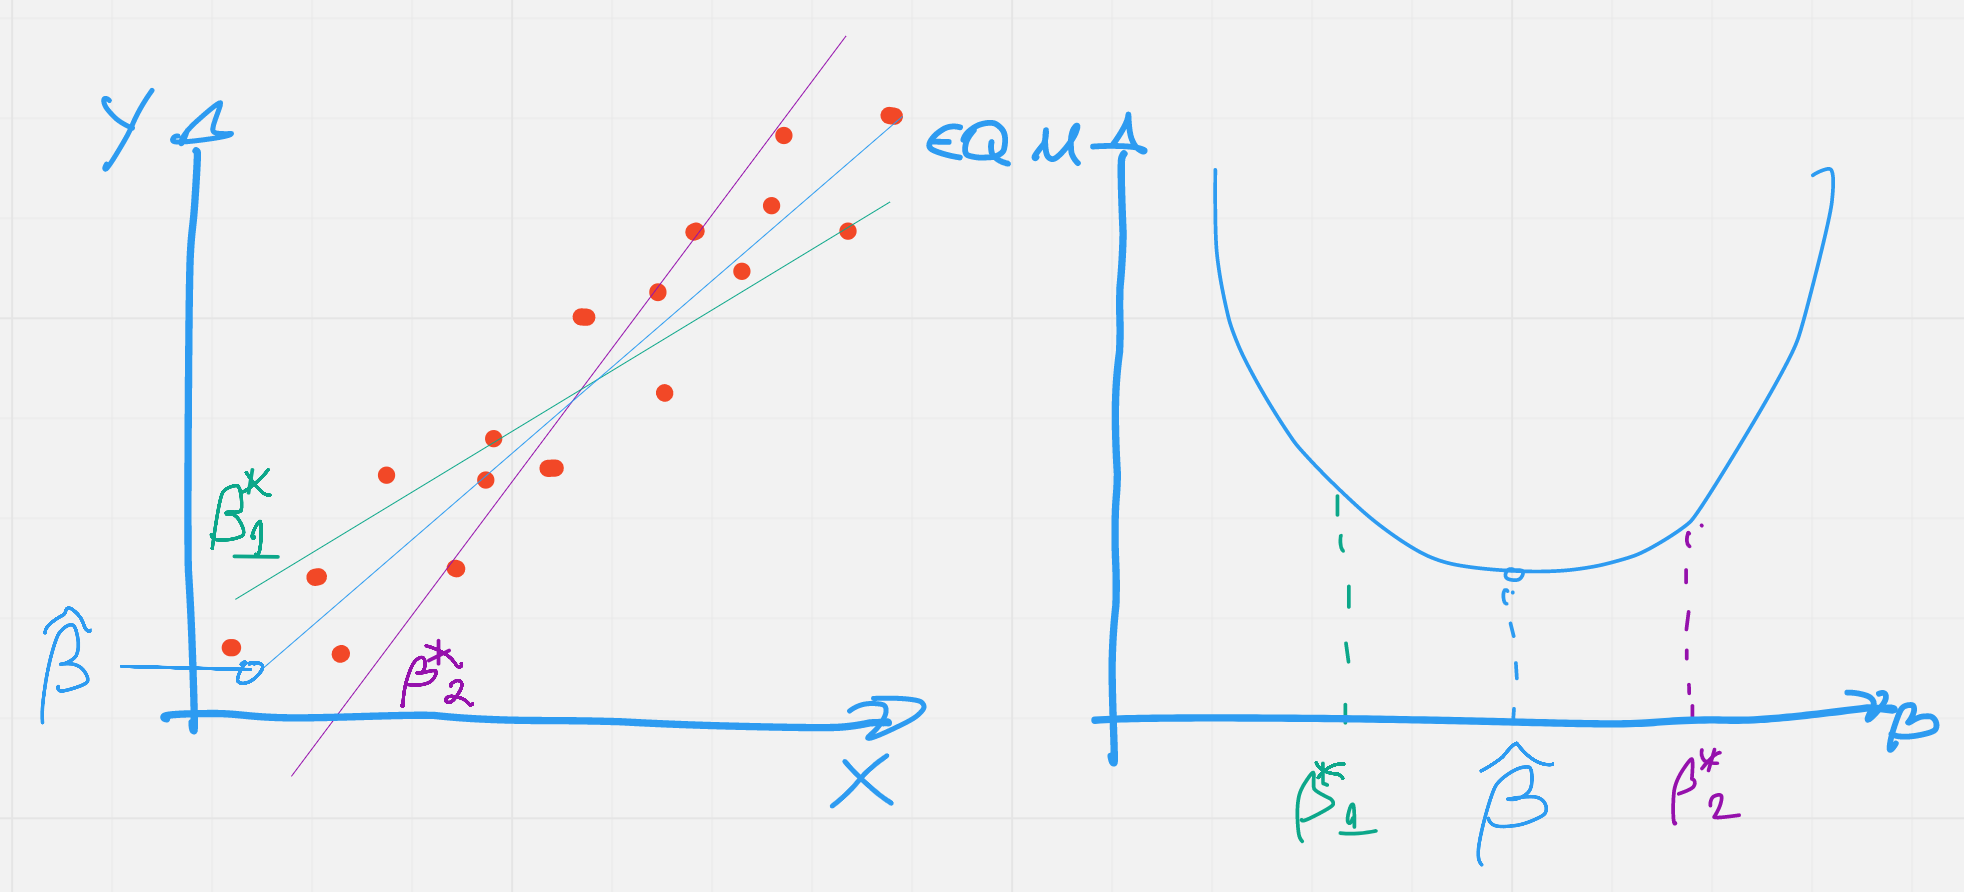
</div>

Nem toda função é derivável. Algumas funções vão admitir mais de uma reta que passa por (x, f(x)) com inclinações diferentes.

Uma demonstração disso está disponível na [wikipedia](https://pt.wikipedia.org/wiki/M%C3%A9todo_dos_m%C3%ADnimos_quadrados)


Vamos tomar como exemplo uma regressão na base de gorjetas, explicando a variável ```tip``` com a variável explicativa ```net_bill```. Considere a função da soma de quadrados do erro dessa regressão como uma função de $\alpha$ e $\beta$.


### Exemplo visual
Vamos tomar como exemplo uma regressão na base de gorjetas, explicando a variável ```tip``` com a variável explicativa ```net_bill```. Considere a função da soma de quadrados do erro dessa regressão como uma função de $\alpha$ e $\beta$.

Vamos então importar a base de gorjetas e dar uma olhadela na regressão mencionada feita pelo statsmodels.

In [ ]:
import seaborn as sns
import statsmodels.formula.api as smf

df = sns.load_dataset('tips')
df['net_bill'] = df['total_bill'] - df['tip']

reg = smf.ols('tip ~ net_bill', data=df).fit()

resumo_reg = reg.summary()
resumo_reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           5.02e-23
Time:                        12:09:22   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vamos 'brincar' um pouco com a função da soma de quadrados do modelo:

In [ ]:
y = df['tip']
x = df['net_bill']

def calcula_sqm (y, y_hat): 
    return (((y - y_hat)**2).sum())

a = 1
b = .09
calcula_sqm(y, a + b*x)

369.83795079

Agora vamos montar um grid para calcular o erro quadrático médio na base de gorjetas, para diferentes combinações de $\alpha$ e $\beta$.

In [ ]:
alpha_min = .3
alpha_max = 2.3
n_bins=20
delta1 = (alpha_max - alpha_min)/n_bins

beta_min = .045
beta_max = .15
delta2 = (beta_max - beta_min)/n_bins

# Definir o grid para calcular EQM em função de alpha e beta
grid_alpha = np.arange(alpha_min, alpha_max, delta1)
grid_beta = np.arange(beta_min, beta_max, delta2)


Vamos calcular a soma dos quadrados dos erros do modelo (SQM) para cada combinação de $\alpha$ e $\beta$ agora.

In [ ]:
%%time

# Listas vazias que vão receber valores para plotarmos depois
i_alpha = []
i_beta = []
i_eqm = []

for alpha in grid_alpha:
    for beta in grid_beta:
        yhat = alpha + beta*x
        i_alpha.append(alpha)
        i_beta.append(beta)
        i_eqm.append(calcula_sqm(y, yhat))

# Guardar as informações em um dataframe
grid = pd.DataFrame(np.empty((len(grid_alpha) * len(grid_beta), 3)), columns = ['alpha','beta','eqm'])

grid.alpha = i_alpha
grid.beta = i_beta
grid.eqm = i_eqm

CPU times: user 187 ms, sys: 4.82 ms, total: 192 ms
Wall time: 192 ms


<IPython.core.display.Javascript object>


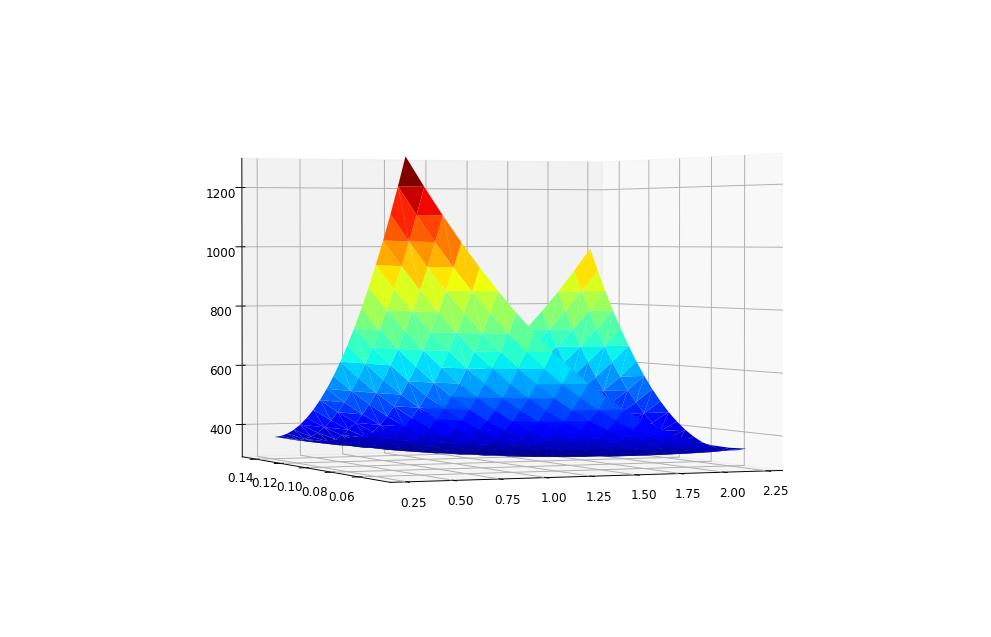

In [ ]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D #eixos 3d
from matplotlib import cm #color map

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_trisurf(grid.alpha, grid.beta, grid.eqm, cmap=cm.jet, linewidth=0.2)
plt.show()

Vamos dar um zoom nassa função para observar melhor os menores valores:

<IPython.core.display.Javascript object>


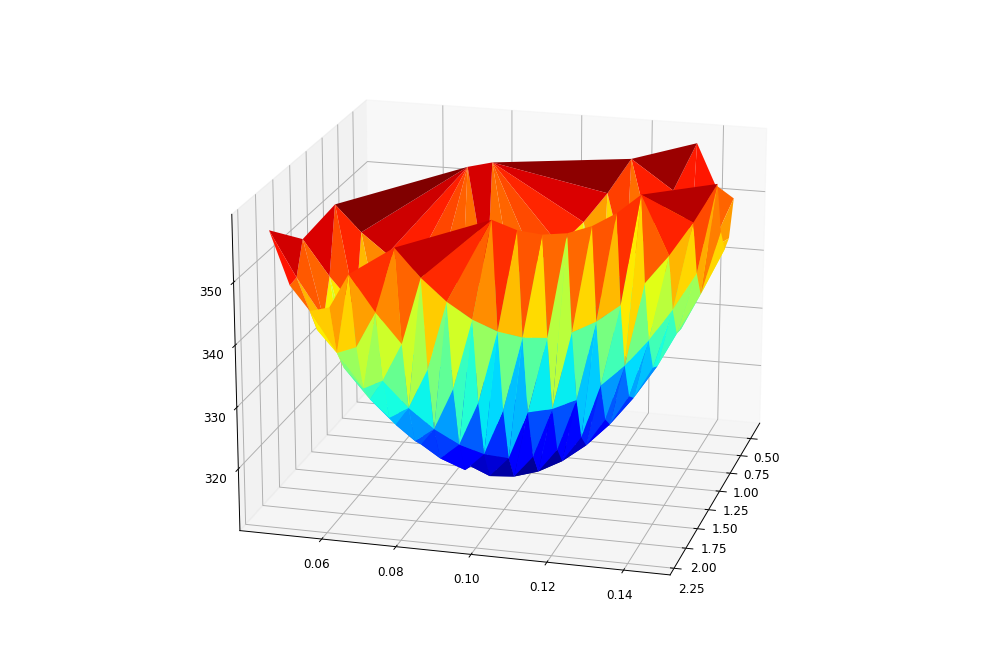

In [ ]:
grid_select=grid[grid.eqm<360]
fig = plt.figure()
ax = Axes3D(fig)

ax.plot_trisurf(grid_select.alpha, 
                grid_select.beta, 
                grid_select.eqm, cmap=cm.jet, linewidth=0.2)
plt.show()

Vamos visualizar agora a função do SQM em função de alpha e beta:

## Integral

Na história da matemática, creio que não há muitos conceitos com impactos tão profundos na ciência e na sociedade como a derivada e a integral (que são intimamente relacionadas). Em ciência de dados, para citar um exemplo, podemos elencar o cálculo de probabilidades - que veremos em mais detalhes adiante.

O conceito de integral está associado com a área abaixo de uma função em um determinado segmento de x (domínio). As primeiras ideias estão relacionadas a dividir o eixo x em segmentos, obtendo retângulos cujo cálculo da área é relativamente fácil ($\Delta x$ a dimensão da base e $f(x)$ a dimensão da altura). Conforme bamos aumentando o número de segmentos, vai diminuindo o tamanho do $\Delta x$. Esse conceito é chamado de *integral de Riemann* e está ilustrado belamente na figura abaixo, extraída da wikipedia.




|![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Riemann_Integration_and_Darboux_Upper_Sums.gif/300px-Riemann_Integration_and_Darboux_Upper_Sums.gif) | ![image-2.png](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Riemann_Integration_and_Darboux_Lower_Sums.gif/300px-Riemann_Integration_and_Darboux_Lower_Sums.gif) |
|:-|:-|

[fonte das imagens](https://en.wikipedia.org/wiki/Integral)


Conforme diminuímos o tamanho do segmento, no limite, chegamos na definição de integral abaixo:
$$ \int_{0}^{a} f(x) dx = \lim_{\Delta x\to 0}\sum_{i=0}^{n} f(x_i^*)\Delta x $$

Nesse contexto, definimos $F(x)$ como a *anti-derivada* ou a *primitiva* de $f(x)$ sendo que:

$$ F'(x) = f(x) $$

![imagem](https://upload.wikimedia.org/wikipedia/commons/2/2f/Fundamental_theorem_of_calculus_%28animation%29.gif)

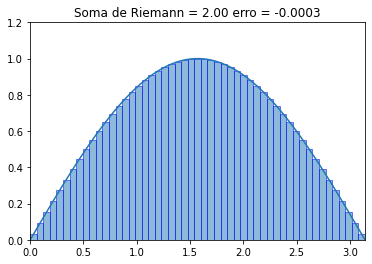

In [ ]:
warnings.filterwarnings("ignore")

# seno de x
f = lambda x: np.sin(x)

def calcula_area(a, b, func, frame_num):
    num_bins=frame_num+1 # Quantidade de retângulos
    delta = (b-a)/num_bins # largura do retângulo
    x_cols = np.linspace(a, b-delta, num_bins)+delta/2 # Divisão do eixo X
    y_cols = f(x_cols) # alturas dos retângulos
    return sum(delta*y_cols)
    

def animate(n, a=0, b=np.pi, func=f, verdadeiro_valor = 2):
    
    plt.cla()  # Limpa o gráfico anterior para montar o próxim frame
    ax = plt.axes(xlim=(a, b), ylim = (0, 1.2))  # Monta o sistema de eixos
    
    # Plota a função
    x = np.linspace(a ,b, 100)
    y = f(x)
    ax.plot(x, y, '-');
    
    # Define as quebras e as alturas das colunas
    num_bins=n+1
    delta = (b-a)/num_bins
    x_cols = np.linspace(a, b-delta, num_bins)+delta/2
    y_cols = f_(x_cols)

    # plota barras
    bar = ax.bar(x_cols, y_cols, alpha=.5, width = delta, edgecolor='blue')   

    # Área dos retângulos
    soma_riemann = calcula_area(a, b, func, n)
    
    # Erro
    erro = verdadeiro_valor - soma_riemann
    ax.set_title(f'Soma de Riemann = {soma_riemann:.2f} erro = {erro:.4f}')

    return bar
animate(50);

Animation.save using <class 'matplotlib.animation.HTMLWriter'>


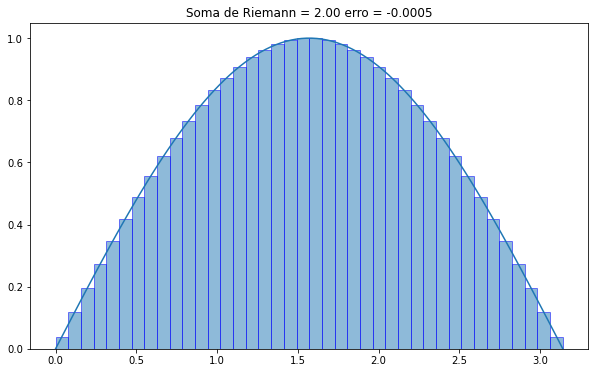

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(10, 6))  # make a new figure
ax = plt.subplot(1,1,1)   

ani = FuncAnimation(fig, animate, frames=40, interval=120, blit=True)
# ani.save('riemann_sum2.gif',writer="imagemagick")
HTML(ani.to_jshtml())

- A função integral de uma função:

A função integral é a "anti-derivada". É a função tal que, se você derivar, dá a mesma função.

De uma forma um pouco mais formal, a integral de $f(x)$ em relação a $x$ é a própria $f(x)$.

$\int f(x) dx = F(x) \Rightarrow F'(x) = f(x)$ 

- Integral definida:

A integral definida é aquela que retorna uma área. Por exemplo, integral de $a$ a $b$ de $f(x)$ fornece a área da função $f(x)$ entre os pontos $a$ e $b$. Isso pode ser escrito assim:

$\int_{a}^{b} f(x) dx = F(b) - F(a)$

Avaliando esta equação obtemos a área sob a curva $f(x)$ entre os pontos a e b.

## Referências

- Construindo gráficos 3d com matplotlib: Esse link tem instruções interessantes sobre como fazer gráficos 3d no python, caso você se interesse, vale dar uma olhada [link](https://www.youtube.com/watch?v=gqoLLGgbeAE)
- Construindo animações com o matplotlib: Fazer animações pode não ser trivial, se você precisar de mais instruções, pode valer a pena olhar este [link](https://www.youtube.com/watch?v=7RgoHTMbp4A)
- 3blue1brown - "a essência do cálculo": Esse canal é muito interessante, ele produz videos com animações muito legais sobre matemática e tem uma playlist altamente recomendável para quem quer entender um pouco mais sobre cálculo, ou simplesmente gosta do assunto [link](https://www.youtube.com/watch?v=WUvTyaaNkzM)
- Artigo sobre derivada da [Wikipedia](https://en.wikipedia.org/wiki/Derivative)
- Artigo sobre integral da [Wikipedia](https://en.wikipedia.org/wiki/Integral)
- Livros sobre cálculo:
    - Há diversos livros sobre o assunto, esse link fala um pouco de alguns deles: [link](https://book360.com.br/melhores-livros-de-calculo-para-universitarios/)
    - Eu usei essa série na minha graduação: "Um Curso de Cálculo - Vol. 1: Volume 1" por  Hamilton Luiz GUIDORIZZI